In [1]:
# base
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

# Важная настройка для корректной настройки pipeline!
import sklearn
sklearn.set_config(transform_output="pandas")

# Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin

# Preprocessing
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler, MinMaxScaler, OrdinalEncoder, TargetEncoder
from sklearn.model_selection import GridSearchCV, KFold

# for model learning
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score

#models
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier
from catboost import CatBoostRegressor

# Metrics
from sklearn.metrics import accuracy_score

# tunning hyperparamters model
import optuna

In [2]:
path = '/Users/maricolada/Downloads/concatenated_train_test.csv'
df = pd.read_csv(path)
df.head(5)

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [7]:
df = df.drop(columns=['Unnamed: 0', 'Id', 'Utilities', 'MSZoning', 'LotFrontage', 'Street', 'Alley', 'LandContour', 'LotConfig', 'LandSlope', 
                        'Condition1', 'Condition2', 'RoofMatl', 'BsmtFinType2', 'BsmtFinSF2', 'Heating', 'LowQualFinSF', 'BsmtHalfBath', 'Functional', 
                        'WoodDeckSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'Fence', 'MoSold', 'YrSold'])
df.head(5)

,MSSubClass,LotArea,LotShape,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,GarageCond,PavedDrive,OpenPorchSF,PoolArea,PoolQC,MiscFeature,MiscVal,SaleType,SaleCondition,SalePrice
0,60,8450,Reg,CollgCr,1Fam,2Story,7,5,2003,2003,...,TA,Y,61,0,NaN,NaN,0,WD,Normal,208500.0
1,20,9600,Reg,Veenker,1Fam,1Story,6,8,1976,1976,...,TA,Y,0,0,NaN,NaN,0,WD,Normal,181500.0
2,60,11250,IR1,CollgCr,1Fam,2Story,7,5,2001,2002,...,TA,Y,42,0,NaN,NaN,0,WD,Normal,223500.0
3,70,9550,IR1,Crawfor,1Fam,2Story,7,5,1915,1970,...,TA,Y,35,0,NaN,NaN,0,WD,Abnorml,140000.0
4,60,14260,IR1,NoRidge,1Fam,2Story,8,5,2000,2000,...,TA,Y,84,0,NaN,NaN,0,WD,Normal,250000.0


In [9]:
pd.DataFrame(data={'NaN_count': df.isna().sum(), 'data_type': df.dtypes})

,NaN_count,data_type
MSSubClass,0,int64
LotArea,0,int64
LotShape,0,object
Neighborhood,0,object
BldgType,0,object
HouseStyle,0,object
OverallQual,0,int64
OverallCond,0,int64
YearBuilt,0,int64
YearRemodAdd,0,int64


In [13]:
# создаем список названий колонок, где тип данных object
list_of_obj_values = df.select_dtypes(include='object').columns.tolist()
len(list_of_obj_values) # 43 колонки из 81

# создадим словарь, где будет количество уникальных значений в каждом столбце
# в том числе НаН будет считаться
unique_values_count = {col: df[col].nunique(dropna=False) for col in list_of_obj_values}

for col in list_of_obj_values:
    total = len(df[col])  # Общее количество строк
    nan_count = df[col].isna().sum()  # Количество NaN
    nan_percentage = (nan_count / total) * 100  # Процентное количество NaN
    print(f"Фича '{col}':")
    print(f"NaN абсолютное кол-во: {nan_count}")
    print(f"NaN в процентах: {nan_percentage:.2f}%")
    print(f"Значения, которые принимает фича:")
    print(df[col].value_counts(dropna=False))
    print("\n" + "="*50 + "\n")  # Разделитель для удобства чтения

Фича 'MSZoning':
NaN абсолютное кол-во: 4
NaN в процентах: 0.14%
Значения, которые принимает фича:
MSZoning
RL         2265
RM          460
FV          139
RH           26
C (all)      25
NaN           4
Name: count, dtype: int64


Фича 'Street':
NaN абсолютное кол-во: 0
NaN в процентах: 0.00%
Значения, которые принимает фича:
Street
Pave    2907
Grvl      12
Name: count, dtype: int64


Фича 'Alley':
NaN абсолютное кол-во: 2721
NaN в процентах: 93.22%
Значения, которые принимает фича:
Alley
NaN     2721
Grvl     120
Pave      78
Name: count, dtype: int64


Фича 'LotShape':
NaN абсолютное кол-во: 0
NaN в процентах: 0.00%
Значения, которые принимает фича:
LotShape
Reg    1859
IR1     968
IR2      76
IR3      16
Name: count, dtype: int64


Фича 'LandContour':
NaN абсолютное кол-во: 0
NaN в процентах: 0.00%
Значения, которые принимает фича:
LandContour
Lvl    2622
HLS     120
Bnk     117
Low      60
Name: count, dtype: int64


Фича 'Utilities':
NaN абсолютное кол-во: 2
NaN в процентах: 0.0

In [11]:
# цифруем значения в LotShape

df['LotShape'] = df['LotShape'].str.strip()

value_to_shape = {
    'Reg': 0,
    'IR1': 1,
    'IR2': 1,
    'IR3': 1
}

df['LotShape'] = df['LotShape'].map(value_to_shape)


# цифруем значения в Neighborhood

df['Neighborhood'] = df['Neighborhood'].str.strip()

target_means_neigh = df.groupby('Neighborhood')['SalePrice'].mean()  # Средние значения целевой переменной
target_encoding_neigh = df['Neighborhood'].map(target_means_neigh) # Замена по средним значениям
target_encoding_neigh.fillna(target_encoding_neigh.mean(), inplace=True)
df['Neighborhood'] = target_encoding_neigh


# цифруем значения в BldgType

df['BldgType'] = df['BldgType'].str.strip()

value_to_bldg = {
    '1Fam': 0,
    'TwnhsE': 1,
    'Duplex': 2,
    'Twnhs': 3,
    '2fmCon': 4
}

df['BldgType'] = df['BldgType'].map(value_to_bldg)


# цифруем значения в HouseStyle

df['HouseStyle'] = df['HouseStyle'].str.strip()

value_to_style = {
    '1Story': 0,
    '2Story': 1,
    '1.5Fin': 0,
    'SLvl': 0,
    'SFoyer': 0,
    '2.5Unf': 0,
    '1.5Unf': 0,
    '2.5Fin': 1
}

df['HouseStyle'] = df['HouseStyle'].map(value_to_style)


# цифруем значения в RoofStyle

target_means_roof = df.groupby('RoofStyle')['SalePrice'].mean()  # Средние значения целевой переменной
target_encoding_roof = df['RoofStyle'].map(target_means_roof) # Замена по средним значениям
target_encoding_roof.fillna(target_encoding_roof.mean(), inplace=True)
df['RoofStyle'] = target_encoding_roof


# цифруем значения в Exterior1st

df['Exterior1st'] = df['Exterior1st'].str.strip()

target_means_exter1 = df.groupby('Exterior1st')['SalePrice'].mean()  # Средние значения целевой переменной
target_encoding_exter1 = df['Exterior1st'].map(target_means_exter1) # Замена по средним значениям
target_encoding_exter1.fillna(target_encoding_exter1.mean(), inplace=True)
df['Exterior1st'] = target_encoding_exter1

# цифруем значения в Exterior2nd

df['Exterior2nd'] = df['Exterior2nd'].str.strip()

target_means_exter2 = df.groupby('Exterior2nd')['SalePrice'].mean()  # Средние значения целевой переменной
target_encoding_exter2 = df['Exterior2nd'].map(target_means_exter2) # Замена по средним значениям
target_encoding_exter2.fillna(target_encoding_exter2.mean(), inplace=True)
df['Exterior2nd'] = target_encoding_exter2


# цифруем значения в MasVnrType

df['MasVnrType'] = df['MasVnrType'].str.strip()

value_to_mas = {
    'NaN': 0,
    'BrkCmn': 1,
    'BrkFace': 2,
    'Stone': 3
}

df['MasVnrType'] = df['MasVnrType'].map(value_to_mas)


# преобразовываем значения в фичах со шкалами оценок

df['ExterQual'] = df['ExterQual'].str.strip()
df['ExterCond'] = df['ExterCond'].str.strip()
df['BsmtQual'] = df['BsmtQual'].str.strip()
df['BsmtCond'] = df['BsmtCond'].str.strip()
df['HeatingQC'] = df['HeatingQC'].str.strip()
df['KitchenQual'] = df['KitchenQual'].str.strip()
df['FireplaceQu'] = df['FireplaceQu'].str.strip()
df['GarageQual'] = df['GarageQual'].str.strip()
df['GarageCond'] = df['GarageCond'].str.strip()


replace_map = {
    'Ex': 5,
    'Gd': 4,
    'TA': 3,
    'Fa': 2,
    'Po': 1,
    'NA': 0,
    'NaN': 0
}
    
df['ExterQual'] = df['ExterQual'].map(replace_map)
df['ExterCond'] = df['ExterCond'].map(replace_map)
df['BsmtQual'] = df['BsmtQual'].map(replace_map)
df['BsmtCond'] = df['BsmtCond'].map(replace_map)
df['HeatingQC'] = df['HeatingQC'].map(replace_map)
df['KitchenQual'] = df['KitchenQual'].map(replace_map)
df['FireplaceQu'] = df['FireplaceQu'].map(replace_map)
df['GarageQual'] = df['GarageQual'].map(replace_map)
df['GarageCond'] = df['GarageCond'].map(replace_map)


# цифруем значения в Foundation

df['Foundation'] = df['Foundation'].str.strip()

value_to_fnd = {
    'Wood': 2,
    'PConc': 2,
    'CBlock': 1,
    'BrkTil': 1,
    'Slab': 0,
    'Stone': 0
}

df['Foundation'] = df['Foundation'].map(value_to_fnd)


# цифруем значения в BsmtExposure 

df['BsmtExposure'] = df['BsmtExposure'].str.strip()

value_to_bsmt = {
    'No': 2,
    'Av': 1,
    'Gd': 1,
    'Mn': 1,
    None: 0 
}

df['BsmtExposure'] = df['BsmtExposure'].map(value_to_bsmt)

# цифруем значения в BsmtFinType1

df['BsmtFinType1'] = df['BsmtFinType1'].str.strip()

target_means_bsmt1 = df.groupby('BsmtFinType1')['SalePrice'].mean()  # Средние значения целевой переменной
target_encoding_bsmt1 = df['BsmtFinType1'].map(target_means_bsmt1) # Замена по средним значениям
target_encoding_bsmt1.fillna(target_encoding_bsmt1.mean(), inplace=True)
df['BsmtFinType1'] = target_encoding_bsmt1


# цифруем значения в CentralAir

df['CentralAir'] = df['CentralAir'].str.strip()

value_to_air = {
    'N': 0,
    'Y': 1
}

df['CentralAir'] = df['CentralAir'].map(value_to_air)


# цифруем значения в Electrical

target_means_elect = df.groupby('Electrical')['SalePrice'].mean()  # Средние значения целевой переменной
target_encoding_elect = df['Electrical'].map(target_means_elect) # Замена по средним значениям
target_encoding_elect.fillna(target_encoding_elect.mean(), inplace=True)
df['Electrical'] = target_encoding_elect


# цифруем значения в GarageType

df['GarageType'] = df['GarageType'].str.strip()

value_to_gar = {
    'Attchd': 3,
    'Detchd': 2,
    'BuiltIn': 2,
    'Basment': 1,
    '2Types': 1,
    'CarPort': 1,
    None: 0 
}

df['GarageType'] = df['GarageType'].map(value_to_gar)


# цифруем значения в GarageFinish

df['GarageFinish'] = df['GarageFinish'].str.strip()

garage_finish_rating = {
    'Fin': 3,    # Полностью отделанный – наивысшая ценность
    'RFn': 2,    # Черновая отделка – средняя ценность
    'Unf': 1,    # Неотделанный – наименьшая ценность среди известных
    'NaN': 0     # Отсутствие данных
}

df['GarageFinish'] = df['GarageFinish'].map(garage_finish_rating)


# цифруем значения в PavedDrive

df['PavedDrive'] = df['PavedDrive'].str.strip()

value_to_paved = {
    'Y': 2,
    'P': 1,
    'N': 0
}

df['PavedDrive'] = df['PavedDrive'].map(value_to_paved)


# цифруем значения в PoolQC

df['PoolQC'] = df['PoolQC'].str.strip()

value_to_pool = {
    'Ex': 3,    # Отличное качество 
    'Gd': 2,    # Хорошее качество 
    'Fa': 1,    # Среднее качество
    'NaN': 0    # Отсутствие бассейна 
}

df['PoolQC'] = df['PoolQC'].map(value_to_pool)


# цифруем значения в MiscFeature 

df['MiscFeature'] = df['MiscFeature'].str.strip()

misc_feature_rating = {
    'TenC': 4,   # Теннисный корт – очень редкий и престижный
    'Gar2': 3,   # Второй гараж – значительное преимущество
    'Othr': 2,   # Другие особенности могут варьироваться по важности
    'Shed': 1,   # Сарай – распространённое преимущество
    'NaN': 0     # Нет дополнительных особенностей – стоит ниже всех.
}

df['MiscFeature'] = df['MiscFeature'].map(misc_feature_rating)


# цифруем значения в SaleType

df['SaleType'] = df['SaleType'].str.strip()

target_means_stype = df.groupby('SaleType')['SalePrice'].mean()  # Средние значения целевой переменной
target_encoding_stype = df['SaleType'].map(target_means_stype) # Замена по средним значениям
target_encoding_stype.fillna(target_encoding_stype.mean(), inplace=True)
df['SaleType'] = target_encoding_stype


# цифруем значения в SaleCondition

df['SaleCondition'] = df['SaleCondition'].str.strip()

target_means_scond = df.groupby('SaleCondition')['SalePrice'].mean()  # Средние значения целевой переменной
target_encoding_scond = df['SaleCondition'].map(target_means_scond) # Замена по средним значениям
target_encoding_scond.fillna(target_encoding_scond.mean(), inplace=True)
df['SaleCondition'] = target_encoding_scond

df

,MSSubClass,LotArea,LotShape,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,GarageCond,PavedDrive,OpenPorchSF,PoolArea,PoolQC,MiscFeature,MiscVal,SaleType,SaleCondition,SalePrice
0,60,8450,0,197965.773333,0,1,7,5,2003,2003,...,3.0,2,61,0,NaN,NaN,0,173401.836622,175202.219533,208500.0
1,20,9600,0,238772.727273,0,0,6,8,1976,1976,...,3.0,2,0,0,NaN,NaN,0,173401.836622,175202.219533,181500.0
2,60,11250,1,197965.773333,0,1,7,5,2001,2002,...,3.0,2,42,0,NaN,NaN,0,173401.836622,175202.219533,223500.0
3,70,9550,1,210624.725490,0,1,7,5,1915,1970,...,3.0,2,35,0,NaN,NaN,0,173401.836622,146526.623762,140000.0
4,60,14260,1,335295.317073,0,1,8,5,2000,2000,...,3.0,2,84,0,NaN,NaN,0,173401.836622,175202.219533,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,1936,0,98576.470588,3,1,4,7,1970,1970,...,NaN,2,0,0,NaN,NaN,0,173401.836622,175202.219533,NaN
2915,160,1894,0,98576.470588,1,1,4,5,1970,1970,...,3.0,2,24,0,NaN,NaN,0,173401.836622,146526.623762,NaN
2916,20,20000,0,156270.122449,0,0,5,7,1960,1996,...,3.0,2,0,0,NaN,NaN,0,173401.836622,146526.623762,NaN
2917,85,10441,0,156270.122449,0,0,5,5,1992,1992,...,NaN,2,32,0,NaN,1.0,700,173401.836622,175202.219533,NaN


In [13]:
df.dtypes

MSSubClass         int64
LotArea            int64
LotShape           int64
Neighborhood     float64
BldgType           int64
HouseStyle         int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle        float64
Exterior1st      float64
Exterior2nd      float64
MasVnrType       float64
MasVnrArea       float64
ExterQual          int64
ExterCond          int64
Foundation         int64
BsmtQual         float64
BsmtCond         float64
BsmtExposure     float64
BsmtFinType1     float64
BsmtFinSF1       float64
BsmtUnfSF        float64
TotalBsmtSF      float64
HeatingQC          int64
CentralAir         int64
Electrical       float64
1stFlrSF           int64
2ndFlrSF           int64
GrLivArea          int64
BsmtFullBath     float64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual      float64
TotRmsAbvGrd       int64
Fireplaces         int64
FireplaceQu      float64


In [81]:
# Преобразование всех object колонок в float и замена NaN на 0
for col in df.select_dtypes(include=['object']).columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Преобразуем в float, некорректные значения становятся NaN

# Замена всех NaN на 0
df.fillna(0, inplace=True)

df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,5.0,65.0,8450,1,0.0,0,0,0,2,...,0,0.0,0.0,0.0,0,2,2008,173401.836622,175202.219533,208500.0
1,20,5.0,80.0,9600,1,0.0,0,0,2,2,...,0,0.0,0.0,0.0,0,5,2007,173401.836622,175202.219533,181500.0
2,60,5.0,68.0,11250,1,0.0,1,0,0,2,...,0,0.0,0.0,0.0,0,9,2008,173401.836622,175202.219533,223500.0
3,70,5.0,60.0,9550,1,0.0,1,0,1,2,...,0,0.0,0.0,0.0,0,2,2006,173401.836622,146526.623762,140000.0
4,60,5.0,84.0,14260,1,0.0,1,0,2,2,...,0,0.0,0.0,0.0,0,12,2008,173401.836622,175202.219533,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,4.0,21.0,1936,1,0.0,0,0,0,2,...,0,0.0,0.0,0.0,0,6,2006,173401.836622,175202.219533,0.0
2915,160,4.0,21.0,1894,1,0.0,0,0,0,2,...,0,0.0,0.0,0.0,0,4,2006,173401.836622,146526.623762,0.0
2916,20,5.0,160.0,20000,1,0.0,0,0,0,2,...,0,0.0,0.0,0.0,0,9,2006,173401.836622,146526.623762,0.0
2917,85,5.0,62.0,10441,1,0.0,0,0,0,2,...,0,0.0,3.0,1.0,700,7,2006,173401.836622,175202.219533,0.0


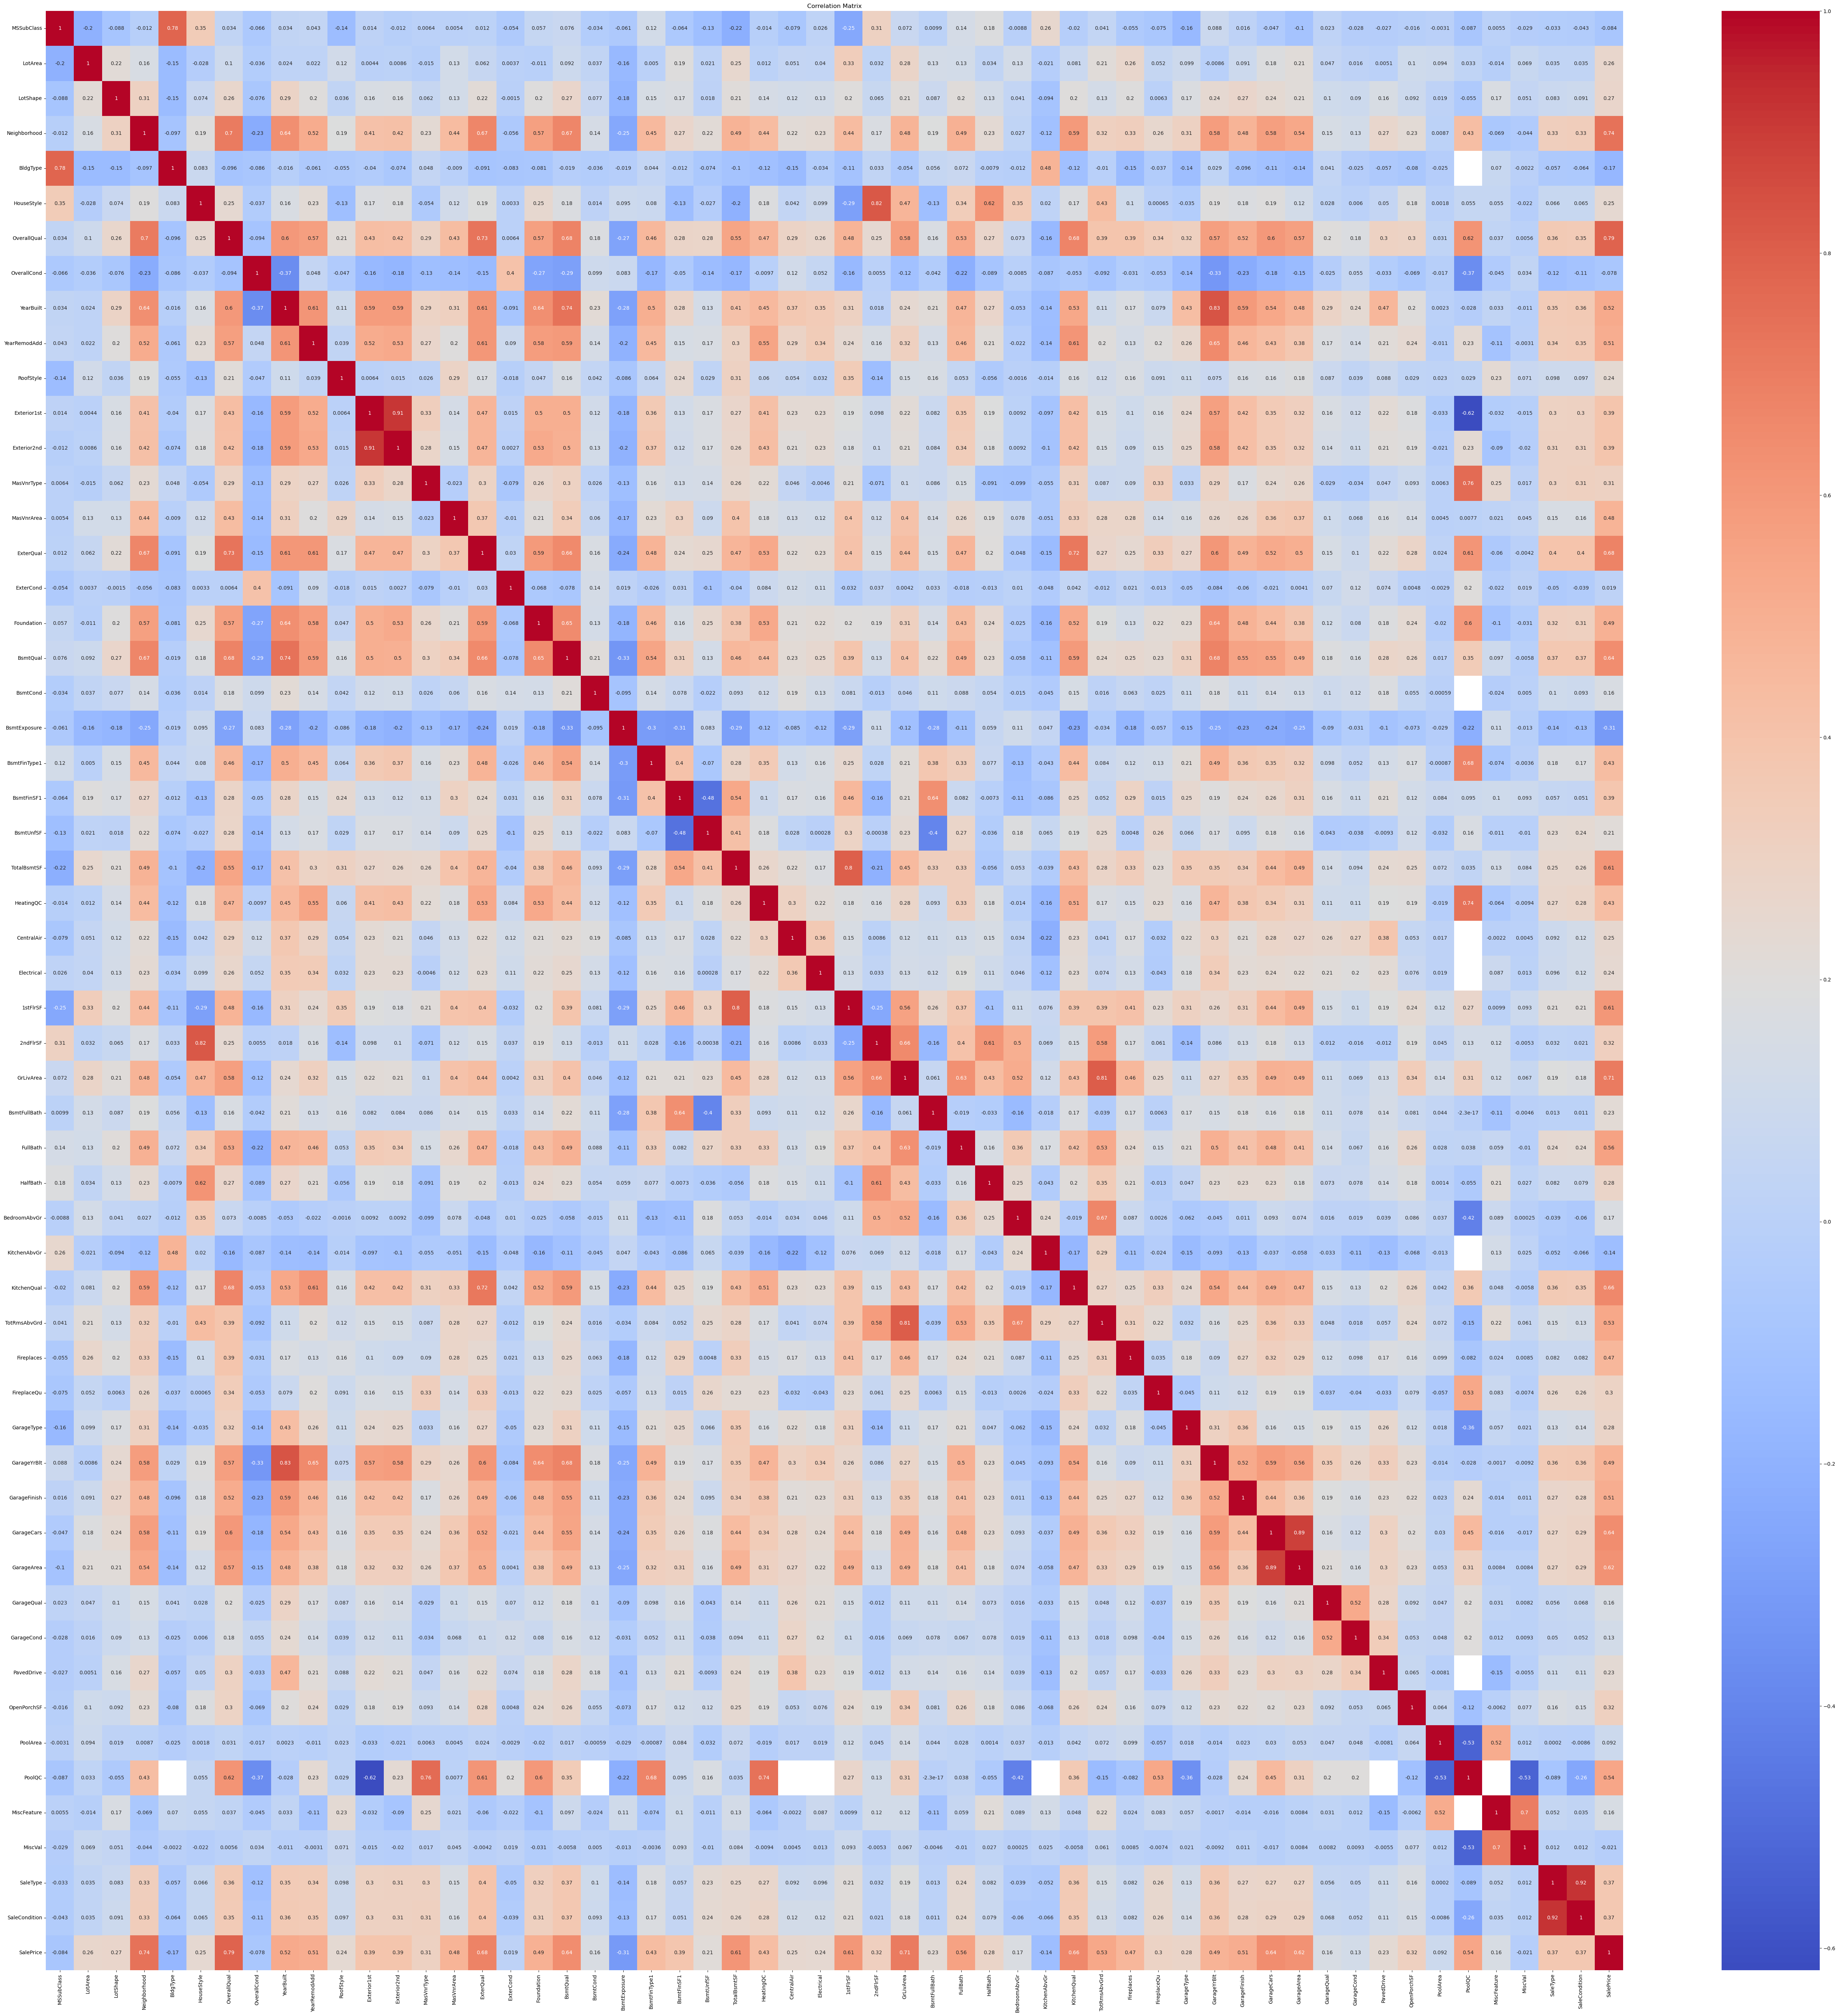

In [15]:
correlation_matrix = df.corr()

plt.figure(figsize=(70, 70))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [17]:
df.corr()['SalePrice'][:-1].sort_values(key=lambda x: abs(x), ascending=False)

OverallQual      0.790982
Neighborhood     0.738630
GrLivArea        0.708624
ExterQual        0.682639
KitchenQual      0.659600
BsmtQual         0.644019
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
PoolQC           0.543811
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
GarageFinish     0.513105
YearRemodAdd     0.507101
Foundation       0.492985
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinType1     0.432725
HeatingQC        0.427649
Exterior2nd      0.392211
Exterior1st      0.390862
BsmtFinSF1       0.386420
SaleType         0.370523
SaleCondition    0.368100
2ndFlrSF         0.319334
OpenPorchSF      0.315856
BsmtExposure    -0.309189
MasVnrType       0.308384
FireplaceQu      0.295794
HalfBath         0.284108
GarageType       0.282359
LotShape         0.267672
LotArea          0.263843
CentralAir       0.251328
HouseStyle       0.247509
Electrical  